In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
#Configure Defaults
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from tqdm import tqdm_notebook

plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

# 데이터 확보

In [2]:
from sklearn.datasets import fetch_20newsgroups
print('Categories')
'/'.join(fetch_20newsgroups(subset='train')['target_names'])

Categories


'alt.atheism/comp.graphics/comp.os.ms-windows.misc/comp.sys.ibm.pc.hardware/comp.sys.mac.hardware/comp.windows.x/misc.forsale/rec.autos/rec.motorcycles/rec.sport.baseball/rec.sport.hockey/sci.crypt/sci.electronics/sci.med/sci.space/soc.religion.christian/talk.politics.guns/talk.politics.mideast/talk.politics.misc/talk.religion.misc'

In [3]:
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'soc.religion.christian', 'talk.politics.guns']

#학습 데이터셋을 가져옴
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)

print('#Train set size:', len(newsgroups_train.data))
print('#Selected categories:', newsgroups_train.target_names)

#Train set size: 2586
#Selected categories: ['alt.atheism', 'comp.graphics', 'soc.religion.christian', 'talk.politics.guns', 'talk.religion.misc']


# 1. 문서간 Cosine similarity와 SpectralCoclustering을 이용한 군집분석

In [4]:
newsgroups_train.data[0:1]

['From: kratz@cs.uiuc.edu (Jason Kratz)\nSubject: Re: criminals & machineguns\nOrganization: University of Illinois at Urbana-Champaign\nDistribution: usa\nLines: 52\n\nIn <1993Apr16.202441.16032@CSD-NewsHost.Stanford.EDU> andy@SAIL.Stanford.EDU (Andy Freeman) writes:\n\n>In article <93104.175256U28037@uicvm.uic.edu> Jason Kratz <U28037@uicvm.uic.edu> writes:\n>>people are getting killed by gang violence every day?  Every single day I hear\n>>about more people getting killed by gang violence and see some of the weapons\n>>that are being confiscated.\n\n>Is Kratz claiming that he can reliably visually distinguish an M-16\n>from an AR-15?  That he can see the difference between a semi-auto and\n>a full-auto UZI?  That he can see the difference between the various\n>versions (some full-auto, some semi-auto only) of the M-11/9?\n\nWell, let me see.  UZI, no.  M-11/9, no.  M-16/AR-15, maybe.  I remember there\nbeing a selector swtich on the AR-15.  If I remember correctly (please correct\nm

In [5]:
pwd

'D:\\기본과제\\script'

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(
    token_pattern="[\w']{3,}", # 모든 영숫자(alphanumeric character)가 3회이상 반복되는 패턴, 이것은 클래스 [a-zA-Z0-9_]와 동등합니다. 
    stop_words='english', 
    max_features=2000, # 최대 단어수
    min_df=5, # 전체 문서에서 5회이상 출현한 단어(하한선)
    max_df=0.5) # 전체문서에서 50%이하 출현한 단어(상한선)
review_cv = cv.fit_transform(newsgroups_train.data) 
#pd.DataFrame(review_cv.toarray(), columns=cv.get_feature_names())

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
pd.DataFrame(TfidfTransformer().fit_transform(review_cv).toarray(), columns=cv.get_feature_names())
tfidf_matrix = TfidfTransformer().fit_transform(review_cv)

,000,100,128,1988,1989,1991,1992,1993,1993apr14,1993apr15,...,yes,yesterday,york,you'd,you'll,you're,you've,young,yoyo,zip
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.049094,0.000000,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.076208,0.119889,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.11948,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
2582,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
2583,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.00000,0.0,0.0,0.044218,0.0,0.000000,0.000000,0.0
2584,0.0,0.099883,0.0,0.0,0.0,0.0,0.0,0.033656,0.000000,0.0,...,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0


In [8]:
pd.DataFrame(TfidfTransformer().fit_transform(review_cv).toarray(), columns=cv.get_feature_names())

,000,100,128,1988,1989,1991,1992,1993,1993apr14,1993apr15,...,yes,yesterday,york,you'd,you'll,you're,you've,young,yoyo,zip
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.049094,0.000000,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.076208,0.119889,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.11948,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
2582,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
2583,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.00000,0.0,0.0,0.044218,0.0,0.000000,0.000000,0.0
2584,0.0,0.099883,0.0,0.0,0.0,0.0,0.0,0.033656,0.000000,0.0,...,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0


In [9]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(tfidf_matrix, tfidf_matrix).shape
cosine_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_matrix

(2586, 2586)

array([[1.        , 0.05328947, 0.03035658, ..., 0.06197449, 0.0325292 ,
        0.03671931],
       [0.05328947, 1.        , 0.03160198, ..., 0.10087144, 0.04164084,
        0.05390604],
       [0.03035658, 0.03160198, 1.        , ..., 0.14608558, 0.05935045,
        0.0191087 ],
       ...,
       [0.06197449, 0.10087144, 0.14608558, ..., 1.        , 0.08483294,
        0.05863312],
       [0.0325292 , 0.04164084, 0.05935045, ..., 0.08483294, 1.        ,
        0.07621155],
       [0.03671931, 0.05390604, 0.0191087 , ..., 0.05863312, 0.07621155,
        1.        ]])

## Clustering 알고리즘  
### Spectral Biclustering algorithm
https://scikit-learn.org/stable/auto_examples/bicluster/plot_spectral_biclustering.html#sphx-glr-auto-examples-bicluster-plot-spectral-biclustering-py

In [10]:
from sklearn.cluster import SpectralBiclustering, SpectralCoclustering
from sklearn.metrics import consensus_score

Text(0.5, 1.0, 'Original dataset')

Text(0.5, 1.0, 'Shuffled dataset')

AttributeError: 'NoneType' object has no attribute 'split'

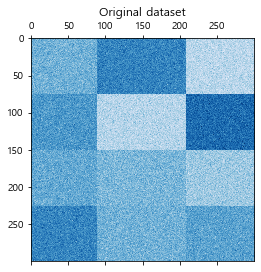

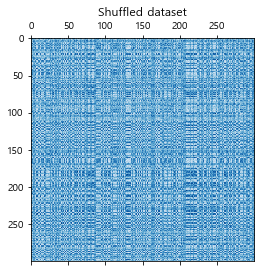

In [11]:
# Author: Kemal Eren <kemal@kemaleren.com>
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_checkerboard
from sklearn.cluster import SpectralBiclustering
from sklearn.metrics import consensus_score


n_clusters = (4, 3)
data, rows, columns = make_checkerboard(
    shape=(300, 300), n_clusters=n_clusters, noise=10, shuffle=False, random_state=0
)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")

# shuffle clusters
rng = np.random.RandomState(0)
row_idx = rng.permutation(data.shape[0])
col_idx = rng.permutation(data.shape[1])
data = data[row_idx][:, col_idx]

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")

model = SpectralBiclustering(n_clusters=n_clusters, method="log", random_state=0)
model.fit(data)
score = consensus_score(model.biclusters_, (rows[:, row_idx], columns[:, col_idx]))

print("consensus score: {:.1f}".format(score))

fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")

plt.matshow(
    np.outer(np.sort(model.row_labels_) + 1, np.sort(model.column_labels_) + 1),
    cmap=plt.cm.Blues,
)
plt.title("Checkerboard structure of rearranged data")

plt.show()

In [12]:
from sklearn.preprocessing import normalize
cosinematrix_ = cosine_matrix.copy()

normed_cosinematrix_ = normalize(cosinematrix_, axis=1, norm='l1')

In [13]:
sns.set_style("white")

sns.set(rc = {'figure.figsize':(20,12)})
i = 1
for i, n in enumerate(np.arange(2, 10)):
    i +=1
    model = SpectralCoclustering(n_clusters=n, random_state=0)
    model.fit(normed_cosinematrix_)

    ax = plt.subplot(3, 6, i)
    ax.matshow(
        np.outer(np.sort(model.row_labels_) + 1, np.sort(model.column_labels_) + 1),
        cmap=plt.cm.Blues,
    )
    ax.set_title(str(n) + " Clusters")
    i += 1    

AttributeError: 'NoneType' object has no attribute 'split'

SpectralCoclustering(n_clusters=2, random_state=0)

Text(0.5, 1.0, '2 Clusters')

SpectralCoclustering(random_state=0)

Text(0.5, 1.0, '3 Clusters')

SpectralCoclustering(n_clusters=4, random_state=0)

Text(0.5, 1.0, '4 Clusters')

SpectralCoclustering(n_clusters=5, random_state=0)

Text(0.5, 1.0, '5 Clusters')

SpectralCoclustering(n_clusters=6, random_state=0)

Text(0.5, 1.0, '6 Clusters')

SpectralCoclustering(n_clusters=7, random_state=0)

Text(0.5, 1.0, '7 Clusters')

SpectralCoclustering(n_clusters=8, random_state=0)

Text(0.5, 1.0, '8 Clusters')

SpectralCoclustering(n_clusters=9, random_state=0)

Text(0.5, 1.0, '9 Clusters')

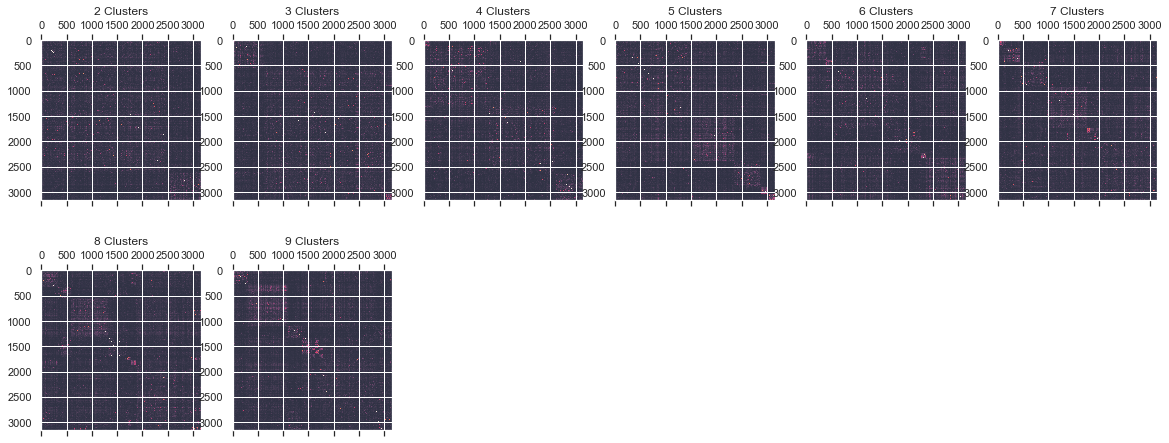

In [28]:
sns.set_style("white")
sns.set(rc = {'figure.figsize':(20,12)})
i = 1
for i, n in enumerate(np.arange(2, 10)):
    i += 1
    model = SpectralCoclustering(n_clusters=n, random_state=0)
    model.fit(normed_cosinematrix_)
    
    fit_data = cosinematrix_[np.argsort(model.row_labels_)]
    fit_data = fit_data[:, np.argsort(model.column_labels_)]

    ax = plt.subplot(3, 6, i)

    ax.matshow(fit_data, alpha=0.8)
    ax.set_title(str(n) + " Clusters")
    i += 1

## 그림에서 보면 4개의 Clusters가 가장 그럴듯함

# https://projector.tensorflow.org/

# 2. Gensim을 이용한 토픽 모델링

In [29]:
#!pip install --upgrade gensim

In [30]:
# 필요한 library들을 import
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

cachedStopWords = stopwords.words("english")

RegTok = RegexpTokenizer("[\w']{3,}") # 정규포현식으로 토크나이저를 정의
english_stops = set(stopwords.words('english')) #영어 불용어를 가져옴

def tokenizer(text):
    tokens = RegTok.tokenize(text.lower()) 
    # stopwords 제외
    words = [word for word in tokens if (word not in english_stops) and len(word) > 2]
    return words

texts = [tokenizer(news) for news in newsgroups_train.data]
len(texts)
type(texts)  # 

3150

list

In [31]:
from gensim.corpora.dictionary import Dictionary

# 토큰화 결과로부터 dictionay 생성
dictionary = Dictionary(texts)
print('#Number of initial unique words in documents:', len(dictionary))

# 문서 빈도수가 너무 적거나 높은 단어를 필터링하고 특성을 단어의 빈도 순으로 선택
dictionary.filter_extremes(keep_n=2000, no_below=5, no_above=0.5)
print('#Number of unique words after removing rare and common words:', len(dictionary))

# 카운트 벡터로 변환
corpus = [dictionary.doc2bow(text) for text in texts]
print('#Number of unique tokens: %d' % len(dictionary))
print('#Number of documents: %d' % len(corpus))

#Number of initial unique words in documents: 47344
#Number of unique words after removing rare and common words: 2000
#Number of unique tokens: 2000
#Number of documents: 3150


In [32]:
from gensim.models import LdaModel

num_topics = 4
passes = 5
%time model = LdaModel(corpus=corpus, id2word=dictionary,\
                       passes=passes, num_topics=num_topics, \
                       random_state=7)

Wall time: 11.9 s


In [16]:
model.print_topics(num_words=10)

[(0,
  '0.014*"sex" + 0.013*"think" + 0.013*"would" + 0.010*"people" + 0.010*"like" + 0.009*"article" + 0.008*"posting" + 0.008*"monash" + 0.008*"well" + 0.007*"nntp"'),
 (1,
  '0.020*"good" + 0.012*"com" + 0.012*"one" + 0.011*"god" + 0.010*"people" + 0.009*"said" + 0.008*"article" + 0.008*"years" + 0.007*"religion" + 0.007*"jesus"'),
 (2,
  '0.020*"space" + 0.018*"nasa" + 0.009*"gov" + 0.008*"mary" + 0.008*"one" + 0.007*"moon" + 0.007*"access" + 0.006*"would" + 0.006*"new" + 0.006*"better"'),
 (3,
  '0.013*"com" + 0.012*"would" + 0.010*"university" + 0.009*"also" + 0.008*"article" + 0.008*"graphics" + 0.008*"know" + 0.008*"i\'m" + 0.007*"like" + 0.007*"one"')]

In [17]:
print("#topic distribution of the first document: ", model.get_document_topics(corpus)[0])
for i, j in enumerate(model.get_document_topics(corpus)):
    if i < 10:
        print(f'{i}번째 문서의 토픽과 그 비중은  {j}')
    else:
        pass

#topic distribution of the first document:  [(0, 0.07943808), (1, 0.04323648), (3, 0.8711647)]
0번째 문서의 토픽과 그 비중은  [(0, 0.07944426), (1, 0.043222044), (3, 0.8711729)]
1번째 문서의 토픽과 그 비중은  [(0, 0.29274845), (1, 0.25751096), (2, 0.076024), (3, 0.37371656)]
2번째 문서의 토픽과 그 비중은  [(1, 0.23807815), (2, 0.16398251), (3, 0.58848697)]
3번째 문서의 토픽과 그 비중은  [(0, 0.06157582), (2, 0.0880798), (3, 0.8472253)]
4번째 문서의 토픽과 그 비중은  [(2, 0.85473555), (3, 0.13109124)]
5번째 문서의 토픽과 그 비중은  [(1, 0.3985107), (2, 0.14915307), (3, 0.4495528)]
6번째 문서의 토픽과 그 비중은  [(1, 0.14898013), (2, 0.36792815), (3, 0.47624075)]
7번째 문서의 토픽과 그 비중은  [(0, 0.12848678), (1, 0.05692975), (3, 0.81103206)]
8번째 문서의 토픽과 그 비중은  [(1, 0.106246844), (2, 0.80413634), (3, 0.085918985)]
9번째 문서의 토픽과 그 비중은  [(2, 0.094308846), (3, 0.8951728)]


In [18]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, corpus, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.008353  0.051782       1        1  50.299315
1      0.028018  0.195361       2        1  19.238389
2     -0.203338 -0.104267       3        1  16.797701
0      0.183674 -0.142876       4        1  13.664595, topic_info=            Term         Freq        Total Category  logprob  loglift
350         nasa   757.000000   757.000000  Default  30.0000  30.0000
370         good   954.000000   954.000000  Default  29.0000  29.0000
253        space  1109.000000  1109.000000  Default  28.0000  28.0000
1559         sex   447.000000   447.000000  Default  27.0000  27.0000
152        think   976.000000   976.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
79           com   203.917611  2222.079416   Topic4  -4.9616  -0.3981
719       person   164.646427   342.403824   Topic4  -5.1755   1.2582
148    something   169.379343   577.971979   Topic4  -5.1471   0.7630
131          one   178.011950  1645.843870   Topic4  -5.0974  -0.2338
297   university   170.612667  1384.357772   Topic4  -5.1399  -0.1032

[297 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1562      1  0.022262    acad3
1562      3  0.022262    acad3
1562      4  0.979539    acad3
33        1  0.038726   access
33        2  0.268313   access
...     ...       ...      ...
1309      4  0.992841     yoyo
335       1  0.011049      zoo
335       3  0.983405      zoo
336       1  0.013206  zoology
336       3  0.990446  zoology

[648 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 1])

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer(
#    stop_words=['and', 'is', 'the', 'this']
)
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names()
X

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [54]:
pd.DataFrame(X.toarray(), columns= vectorizer.get_feature_names())

,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1
1,0,2,0,1,0,1,1,0,1
2,1,0,0,1,1,0,1,1,1
3,0,1,1,1,0,0,1,0,1


In [57]:
X.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
    stop_words=['and', 'is', 'the', 'this']
)

tfidf_matrix = vectorizer.fit_transform(corpus)

In [78]:
pd.DataFrame(tfidf_matrix.toarray(), columns= vectorizer.get_feature_names()).round(2)

,document,first,one,second,third
0,0.63,0.78,0.00,0.00,0.00
1,0.79,0.00,0.00,0.62,0.00
2,0.00,0.00,0.71,0.00,0.71
3,0.63,0.78,0.00,0.00,0.00


In [82]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_matrix

array([[1.        , 0.49534236, 0.        , 1.        ],
       [0.49534236, 1.        , 0.        , 0.49534236],
       [0.        , 0.        , 1.        , 0.        ],
       [1.        , 0.49534236, 0.        , 1.        ]])

In [81]:
vectorizer.get_feature_names()

['document', 'first', 'one', 'second', 'third']

In [85]:
pd.DataFrame(cosine_matrix).round(3)

,0,1,2,3
0,1.000,0.495,0.0,1.000
1,0.495,1.000,0.0,0.495
2,0.000,0.000,1.0,0.000
3,1.000,0.495,0.0,1.000


In [100]:
corpus

['This is the first document.',
 'This document is the second document.',
 'And this is the third one.',
 'Is this the first document?']

In [101]:
from nltk.tokenize import RegexpTokenizer

stop_words =[]
RegTok = RegexpTokenizer("[\w']{2,}") # 정규포현식으로 토크나이저를 정의
food_stops = set(stop_words) # 불용어를 가져옴

def tokenizer(text):
    tokens = RegTok.tokenize(text) 
    # stopwords 제외
    words = [word for word in tokens if (word not in food_stops) and len(word) >= 2] # 2글자 이상만
    return words

texts = [tokenizer(news) for news in corpus]

In [104]:
texts

[['This', 'is', 'the', 'first', 'document'],
 ['This', 'document', 'is', 'the', 'second', 'document'],
 ['And', 'this', 'is', 'the', 'third', 'one'],
 ['Is', 'this', 'the', 'first', 'document']]

In [106]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=texts, size=10, window=5, min_count=1, workers=4, sg=0)

In [107]:
model.wv.similar_by_word('this')

[('Is', 0.23605290055274963),
 ('one', 0.16905057430267334),
 ('document', 0.03853313624858856),
 ('first', -0.014500439167022705),
 ('is', -0.11263386905193329),
 ('And', -0.16469086706638336),
 ('This', -0.22887897491455078),
 ('third', -0.24492639303207397),
 ('second', -0.2711833715438843),
 ('the', -0.39225006103515625)]

In [110]:
# 단어벡터를 구한다.
word_vectors = model.wv
word_vectors
vocabs = word_vectors.vocab.keys()
vocabs
word_vectors_list = [word_vectors[v] for v in vocabs]
len(word_vectors_list)

dict_keys(['This', 'is', 'the', 'first', 'document', 'second', 'And', 'this', 'third', 'one', 'Is'])

11

In [111]:
from sklearn.metrics import pairwise_distances
pd.options.display.float_format = '{:,.2f}'.format
cosinematrix = pd.DataFrame(cosine_similarity(word_vectors_list,dense_output=False), columns=vocabs)
cosinematrix.index = vocabs
cosinematrix.style.background_gradient(axis=0)  

,This,is,the,first,document,second,And,this,third,one,Is
This,1.000000,-0.129521,0.417849,-0.473698,0.229584,-0.443651,0.262478,-0.228879,0.135515,-0.266861,0.184679
is,-0.129521,1.000000,-0.265212,-0.308517,-0.527140,0.283737,-0.226289,-0.112634,0.057837,0.398557,-0.211541
the,0.417849,-0.265212,1.000000,-0.229644,0.474049,0.240263,0.202721,-0.392250,-0.046907,-0.911141,0.055554
first,-0.473698,-0.308517,-0.229644,1.000000,0.183617,0.180221,-0.304306,-0.014500,-0.118091,0.028260,-0.391974
document,0.229584,-0.527140,0.474049,0.183617,1.000000,-0.007699,0.066810,0.038533,-0.047692,-0.509139,0.330720
second,-0.443651,0.283737,0.240263,0.180221,-0.007699,1.000000,-0.544814,-0.271183,-0.346863,-0.355339,-0.290624
And,0.262478,-0.226289,0.202721,-0.304306,0.066810,-0.544814,1.000000,-0.164691,0.149010,0.015484,0.072073
this,-0.228879,-0.112634,-0.392250,-0.014500,0.038533,-0.271183,-0.164691,1.000000,-0.244926,0.169051,0.236053
third,0.135515,0.057837,-0.046907,-0.118091,-0.047692,-0.346863,0.149010,-0.244926,1.000000,0.220113,0.587449
one,-0.266861,0.398557,-0.911141,0.028260,-0.509139,-0.355339,0.015484,0.169051,0.220113,1.000000,-0.077482


<AxesSubplot:>

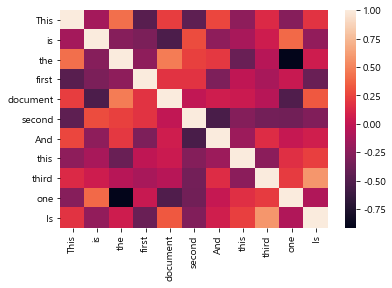

In [112]:
sns.heatmap(cosinematrix)